<a href="https://colab.research.google.com/github/sabya120528/book_segmentaion/blob/main/openbook_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Mon Jul  3 07:33:40 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8    10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)


/content


In [ ]:
!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model=yolov8s-seg.pt conf=0.25 source='/content/YOLODataset/images/train/771a5e8e-8105-4664-a2fb-91b164c24657.png' save=true


/content
2023-07-03 08:06:45.785912: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-03 08:06:46.712281: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11810560 parameters, 0 gradients, 42.6 GFLOPs

image 1/1 /content/YOLODataset/images/train/771a5e8e-8105-4664-a2fb-91b164c24657.png: 384x640 2 persons, 2 books, 137.2ms
Speed: 0.9ms pre-process, 137.2ms inference, 118.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict5


/content


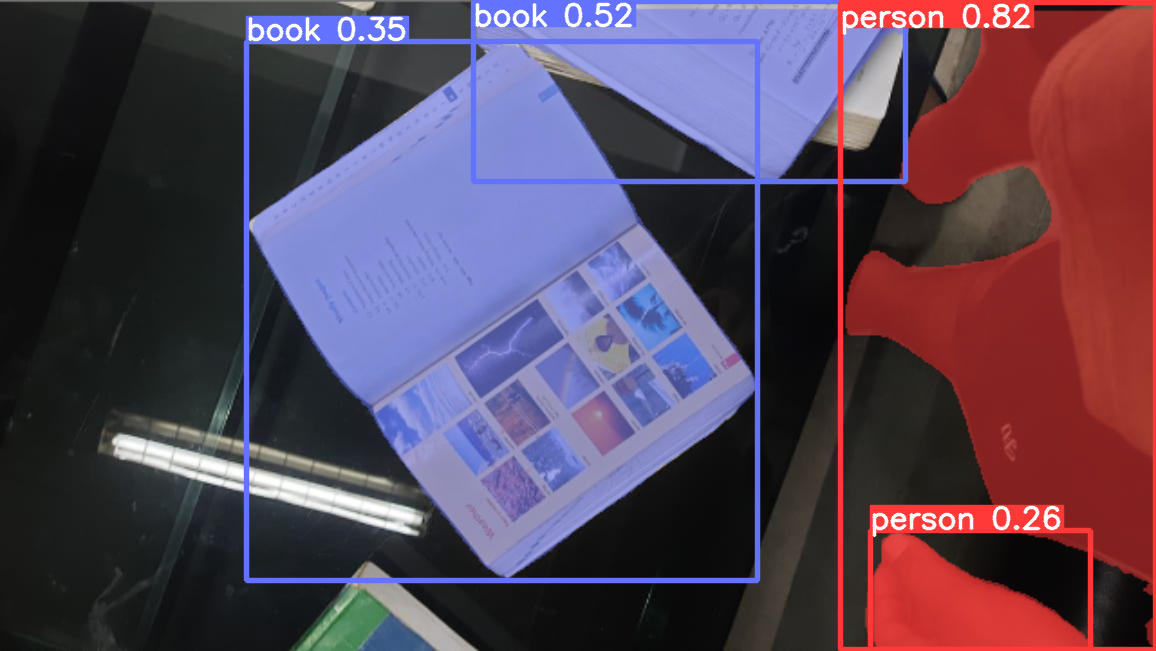

In [ ]:
%cd {HOME}
Image(filename='/content/runs/segment/predict5/771a5e8e-8105-4664-a2fb-91b164c24657.png', height=600)

In [ ]:
!yolo task=segment mode=train model=yolov8s-seg.pt data=dataset.yaml epochs=15 imgsz=640 save=true

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=dataset.yaml, epochs=15, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=None, workspace=4, nm

In [ ]:
!ls runs/segment/train3/


args.yaml					     results.csv
BoxF1_curve.png					     results.png
BoxP_curve.png					     train_batch0.jpg
BoxPR_curve.png					     train_batch1.jpg
BoxR_curve.png					     train_batch2.jpg
confusion_matrix.png				     train_batch5.jpg
events.out.tfevents.1688370406.243a10c06786.11559.0  train_batch6.jpg
MaskF1_curve.png				     train_batch7.jpg
MaskP_curve.png					     val_batch0_labels.jpg
MaskPR_curve.png				     val_batch0_pred.jpg
MaskR_curve.png					     weights


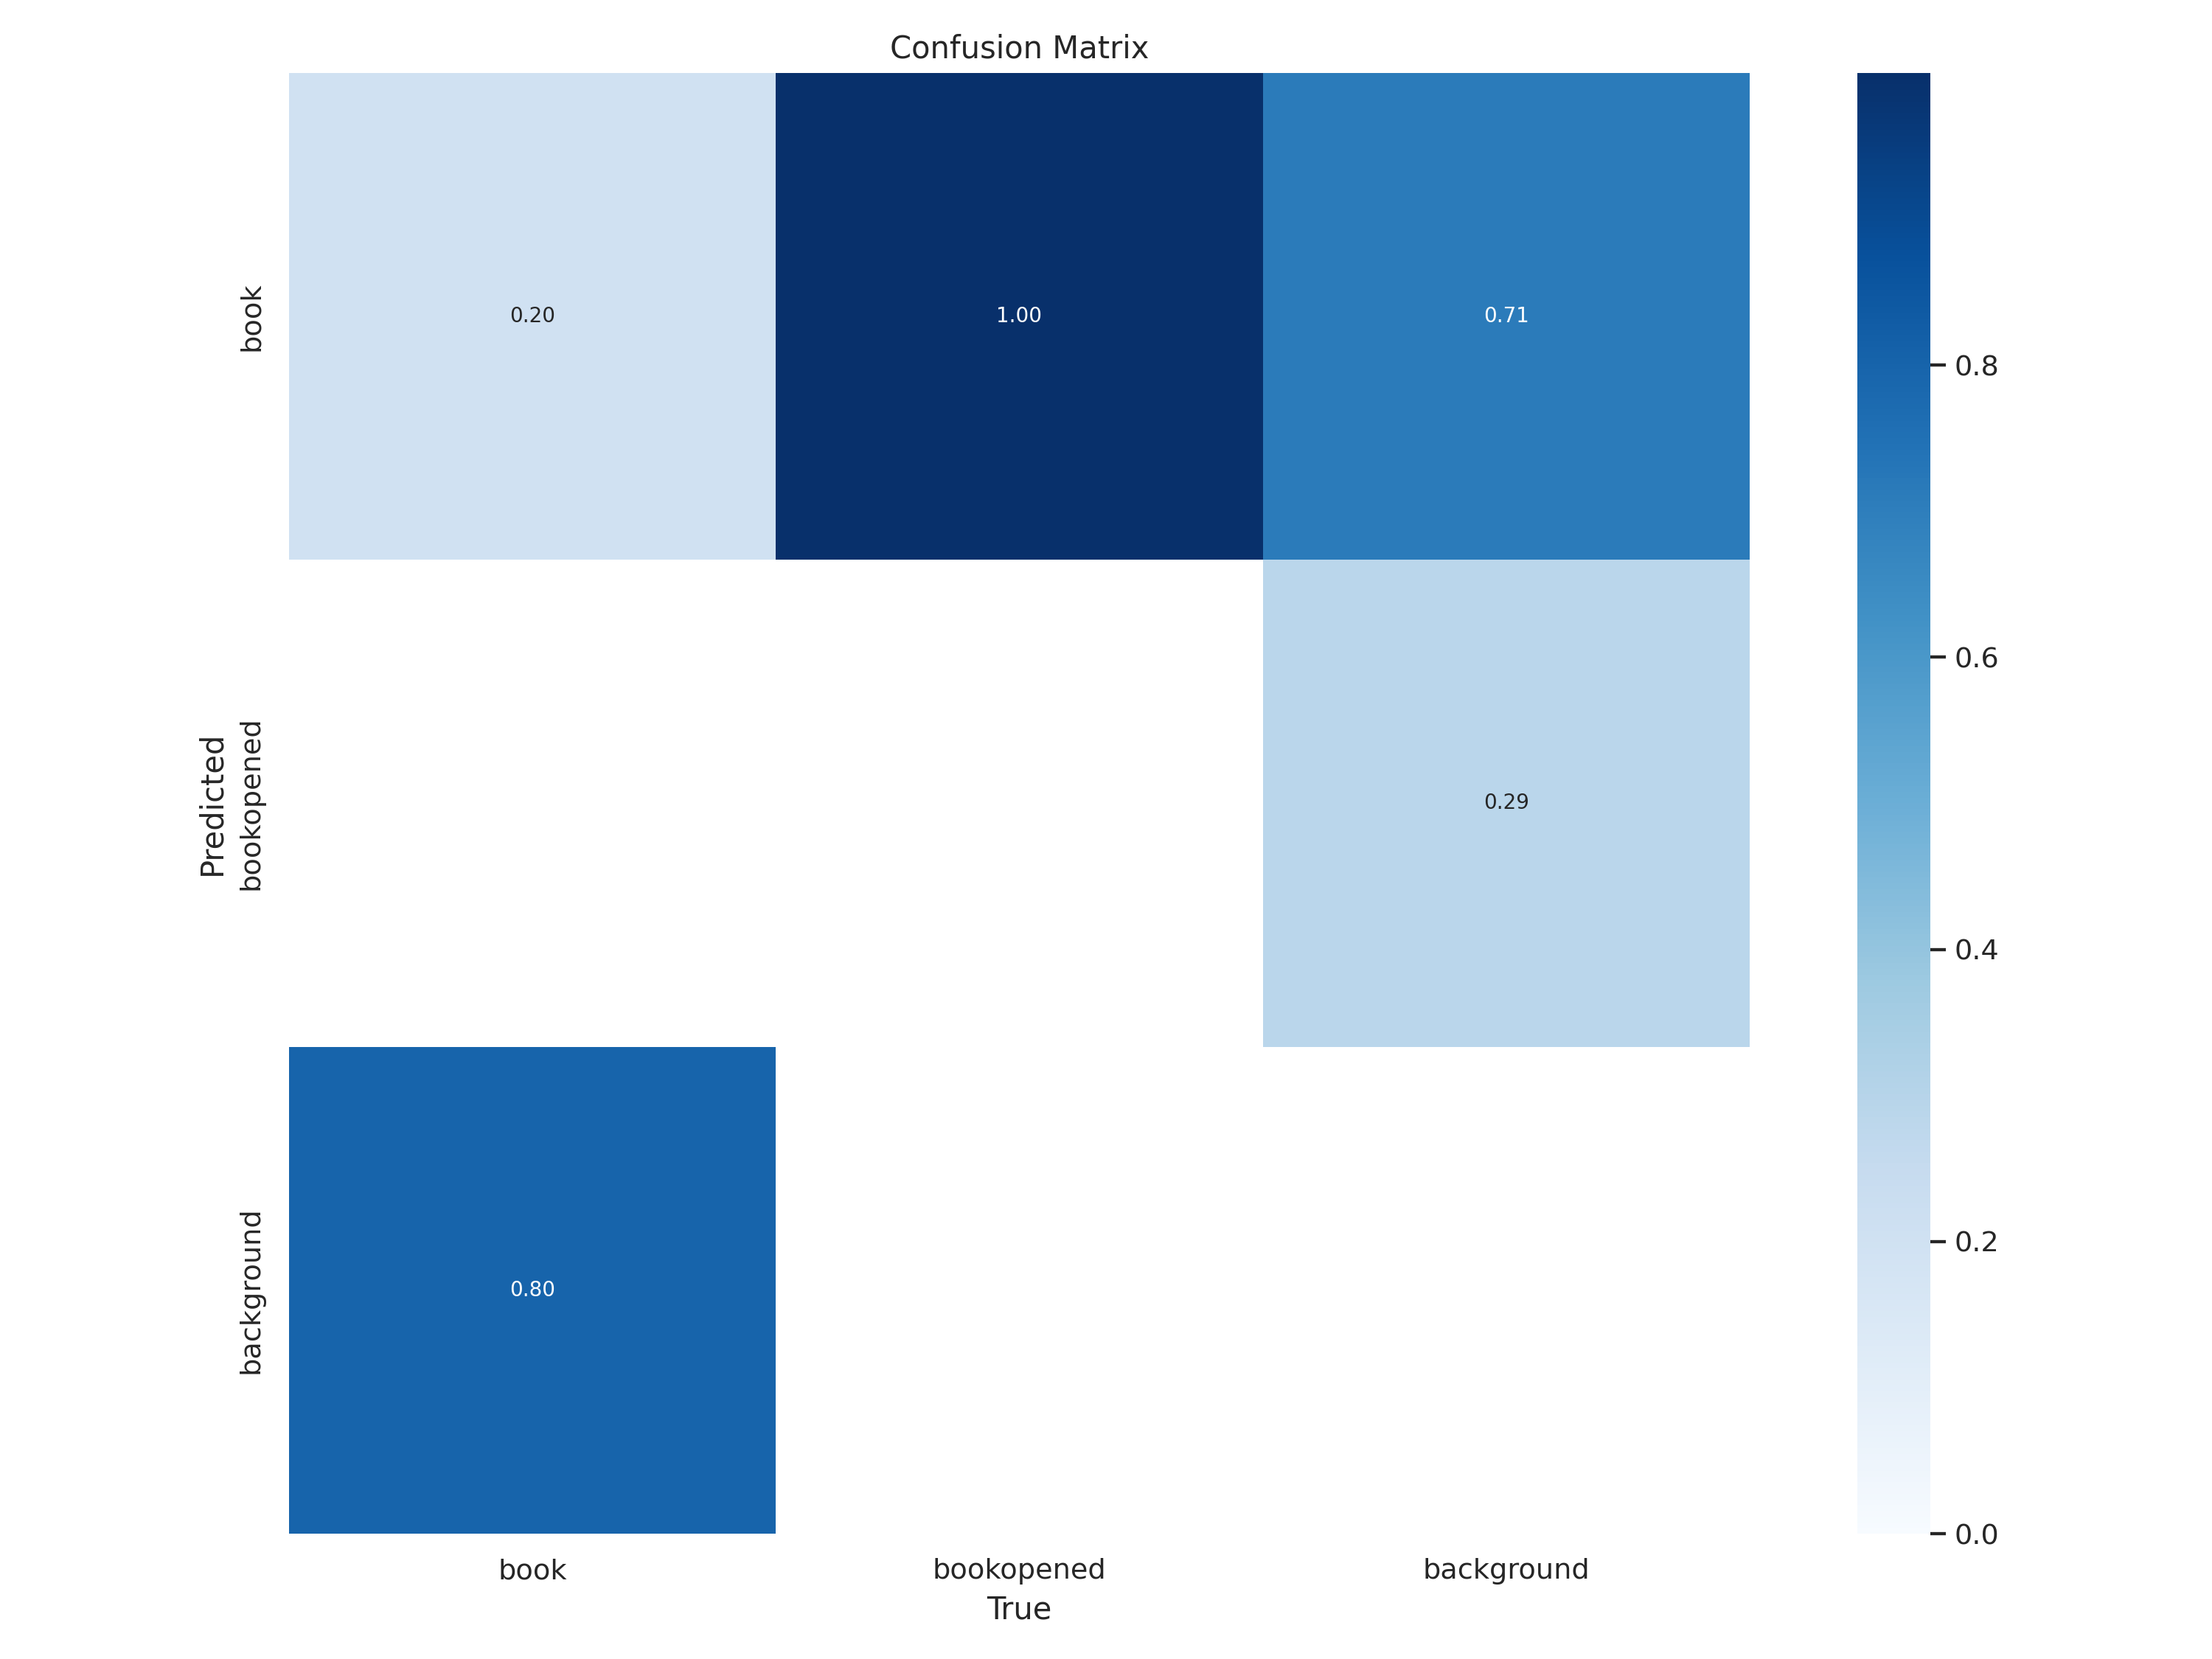

In [ ]:
Image(filename=f'runs/segment/train3/confusion_matrix.png', width=600)

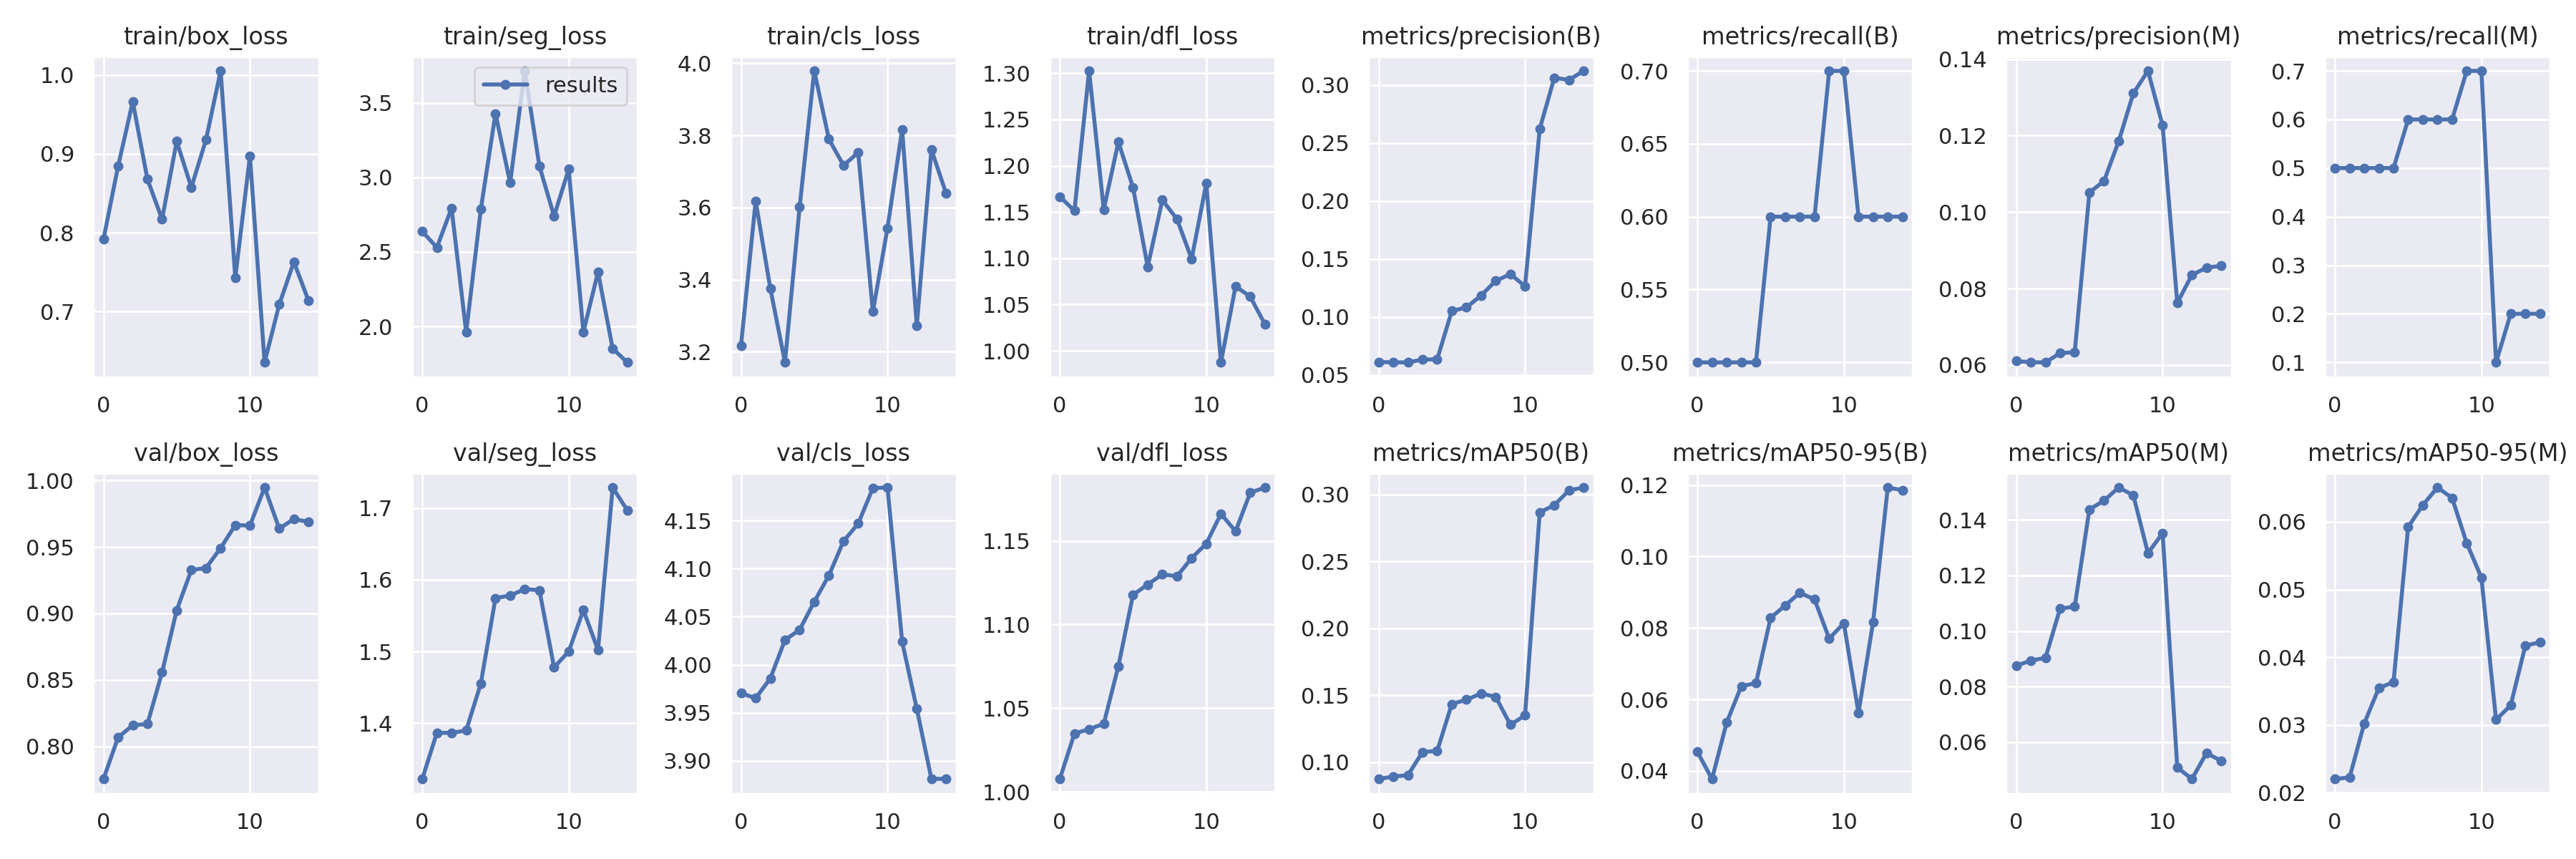

In [ ]:
Image(filename=f'runs/segment/train3/results.png', width=600)

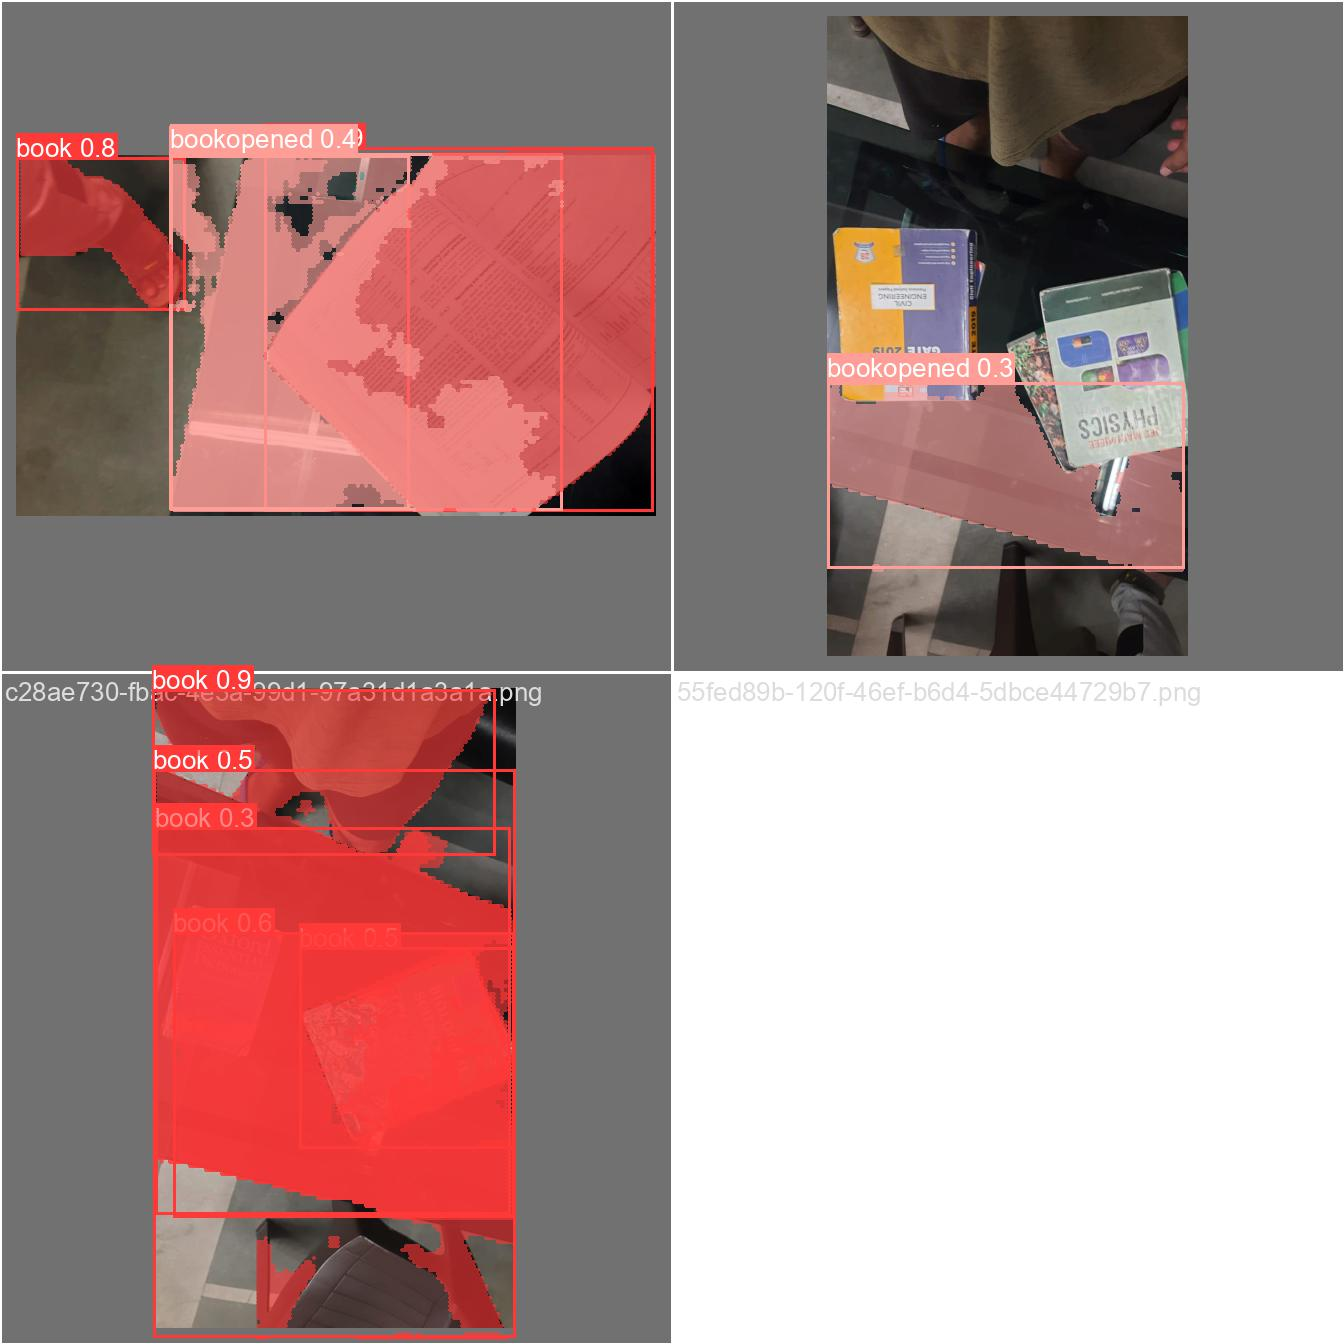

In [ ]:
Image(filename=f'runs/segment/train3/val_batch0_pred.jpg', width=600)

In [ ]:
!yolo task=segment mode=val model=runs/segment/train3/weights/best.pt data=dataset.yaml

2023-07-03 07:49:13.594462: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-03 07:49:14.844759: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780374 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/YOLODataset/labels/val.cache... 3 images, 0 backgrounds, 0 corrupt: 100% 3/3 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  2.14it/s]
                   all          3          6      0.304        0.6      0.303       0.12     0.0852      

In [ ]:
!yolo task=segment mode=predict model=runs/segment/train3/weights/best.pt conf=0.25 source=/content/YOLODataset/images/test save=true

2023-07-03 07:49:33.762306: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-03 07:49:34.603093: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780374 parameters, 0 gradients, 42.4 GFLOPs

image 1/2 /content/YOLODataset/images/test/image19.jpeg: 480x640 1 book, 118.2ms
image 2/2 /content/YOLODataset/images/test/images164.jpg: 384x640 3 books, 124.5ms
Speed: 0.5ms pre-process, 121.4ms inference, 77.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict4


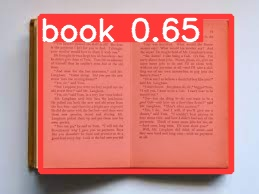

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'runs/segment/predict4/*.jpeg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")